DATA PREPROCESSING


IMPORT PACKAGES AND CSV


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#machine learning models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

#preprocessing functions and evaluation models
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.impute import SimpleImputer #to hande missing value
from sklearn.preprocessing import OneHotEncoder #to change catgeorical variavble into numerical variable
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,classification_report,roc_auc_score
from sklearn.preprocessing import StandardScaler # for scaling 

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")





In [2]:
df=pd.read_csv("covtype.csv")
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


Data Cleaning

Checking feature with Nan value

In [3]:
features_with_na=[feature for feature in df.columns if df[feature].isnull().sum()>=1]
for features in features_with_na:
    print(features,np.round(df[features].isnull().mean()*100,5),"% missing values")


No misiing values

Handling Duplicates


In [4]:
df.duplicated().sum()

0

NO Duplicates value find
If duplicated value founded and is very much in row then we actually delete that row

mport pandas as pd

data = {
    'Name': ['Amit', 'Rahul', 'Amit', 'Neha'],
    'Age': [25, 22, 25, 30],
    'City': ['Delhi', 'Mumbai', 'Delhi', 'Kolkata']
}
df = pd.DataFrame(data)

|    | Name  | Age | City    |                      |
| -: | ----- | --- | ------- | -------------------- |
|  0 | Amit  | 25  | Delhi   |                      |
|  1 | Rahul | 22  | Mumbai  |                      |
|  2 | Amit  | 25  | Delhi   | ← Duplicate of row 0 |
|  3 | Neha  | 30  | Kolkata |                      |

df.duplicated()

[False, False, True, False]

df.drop_duplicates(inplace=True)

| Problem Type                       | What You Should Do                       |
| ---------------------------------- | ---------------------------------------- |
| Same rows repeating                | Use `df.drop_duplicates()`               |
| A column has same value everywhere | Drop that column                         |
| A column is 95% one value          | Mostly drop it                           |
| Two columns have same values       | Keep one, drop other                     |
| Not sure what to drop?             | Check value counts or feature importance |




Feature Engeenering

Numerical features


In [5]:
numerical_features=[feature for feature in df.columns if df[feature].dtype!='O']
print("Number of Nuerical Features:",len(numerical_features))

Number of Nuerical Features: 55


Categorical Feature

In [6]:
categorical_features=[feature for feature in df.columns if df[feature].dtype=='O']
print("Number of Categorical Features:",len(categorical_features))

Number of Categorical Features: 0


Discrete features


In [7]:
Discrete_features=[feature for feature in numerical_features if (len(df[feature].unique())<=25)]
print("Numrical of Discrete features:",len(Discrete_features))

Numrical of Discrete features: 45


Continous Features


In [8]:
continous_features=[feature for feature in numerical_features if (len(df[feature].unique())>25)]
print("Number of Discrete Features:",len(continous_features))

Number of Discrete Features: 10


Check Outlier and Capping it

Why Outlier?

Data Entry error:human error

Measurement error:Instrument Error

Natural Error:It will be Real life data

International error:People giving wrong inputs

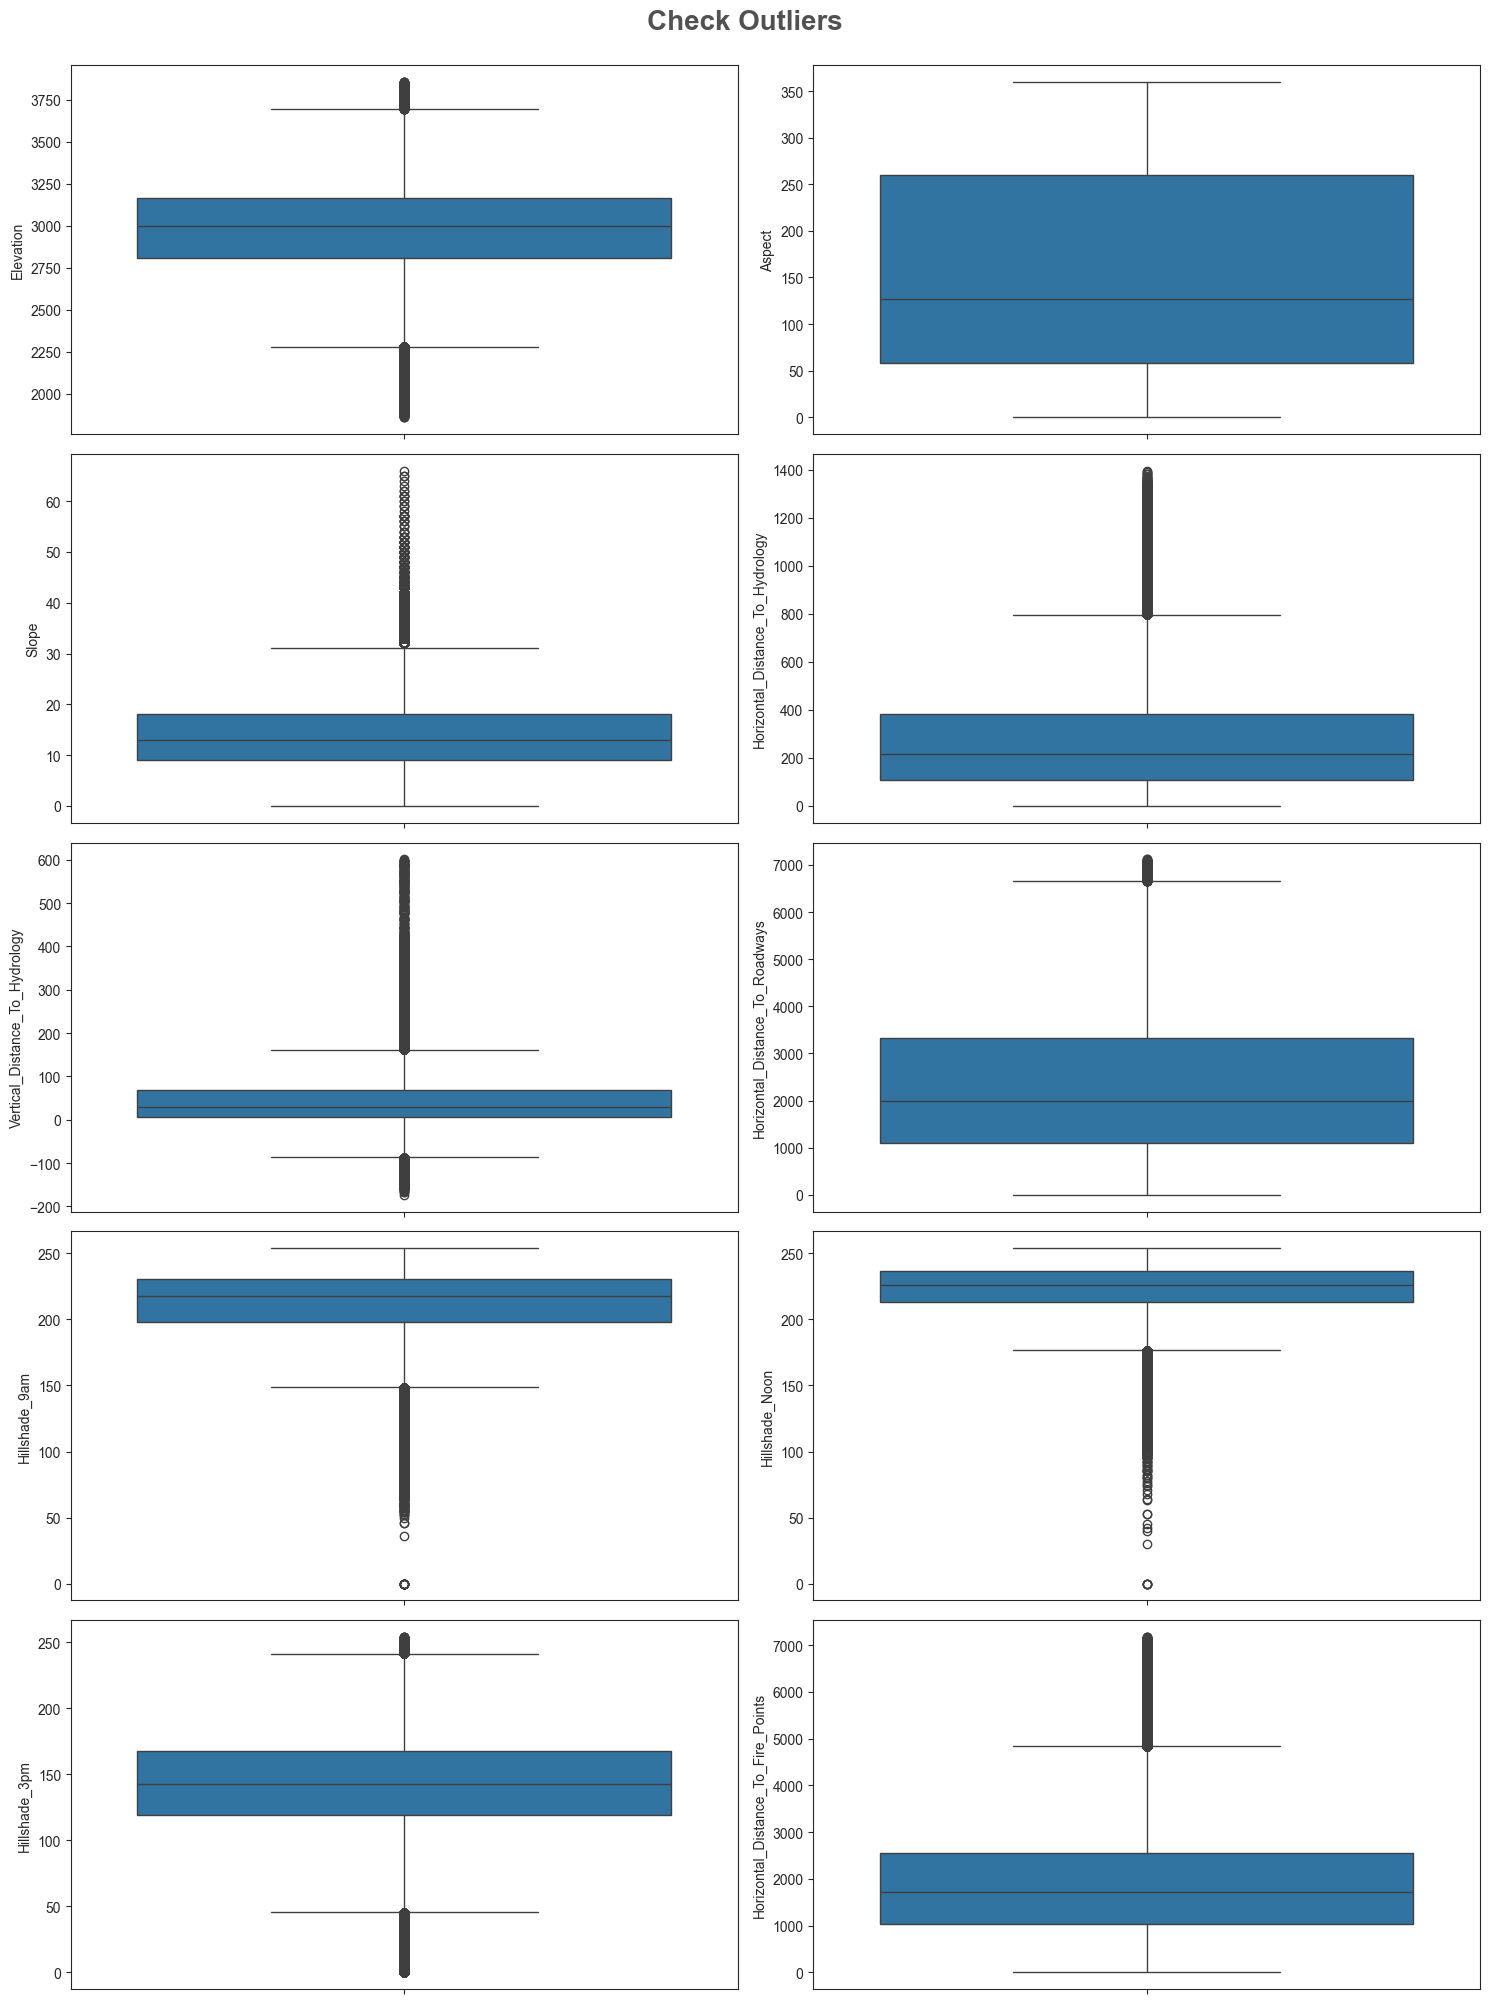

In [14]:
plt.figure(figsize=(15,20))
plt.suptitle("Check Outliers",fontsize=20,fontweight='bold',alpha=0.8,y=1.)
for i in range(0,len(continous_features)):
    plt.subplot(5,2,i+1)
    sns.set_style('ticks')
    sns.boxplot(df[continous_features[i]])
    plt.tight_layout()

Except "Aspect" rest all the 9 featurtes has outlier

In [15]:
df_copy=df.copy()
def detect_and_capping_outliers(col):
    #finding the IQR
    percentile25=df_copy[col].quantile(0.25)
    percentile75=df_copy[col].quantile(0.75)
    iqr=percentile75-percentile25
    upperlimit=percentile75+1.5*iqr
    lowerlimit=percentile25-1.5*iqr
    df_copy.loc[(df[col]>upperlimit),col]=upperlimit
    df_copy.loc[(df[col]<lowerlimit),col]=lowerlimit
    return df_copy

In [16]:
for col in continous_features:
    detect_and_capping_outliers(col)

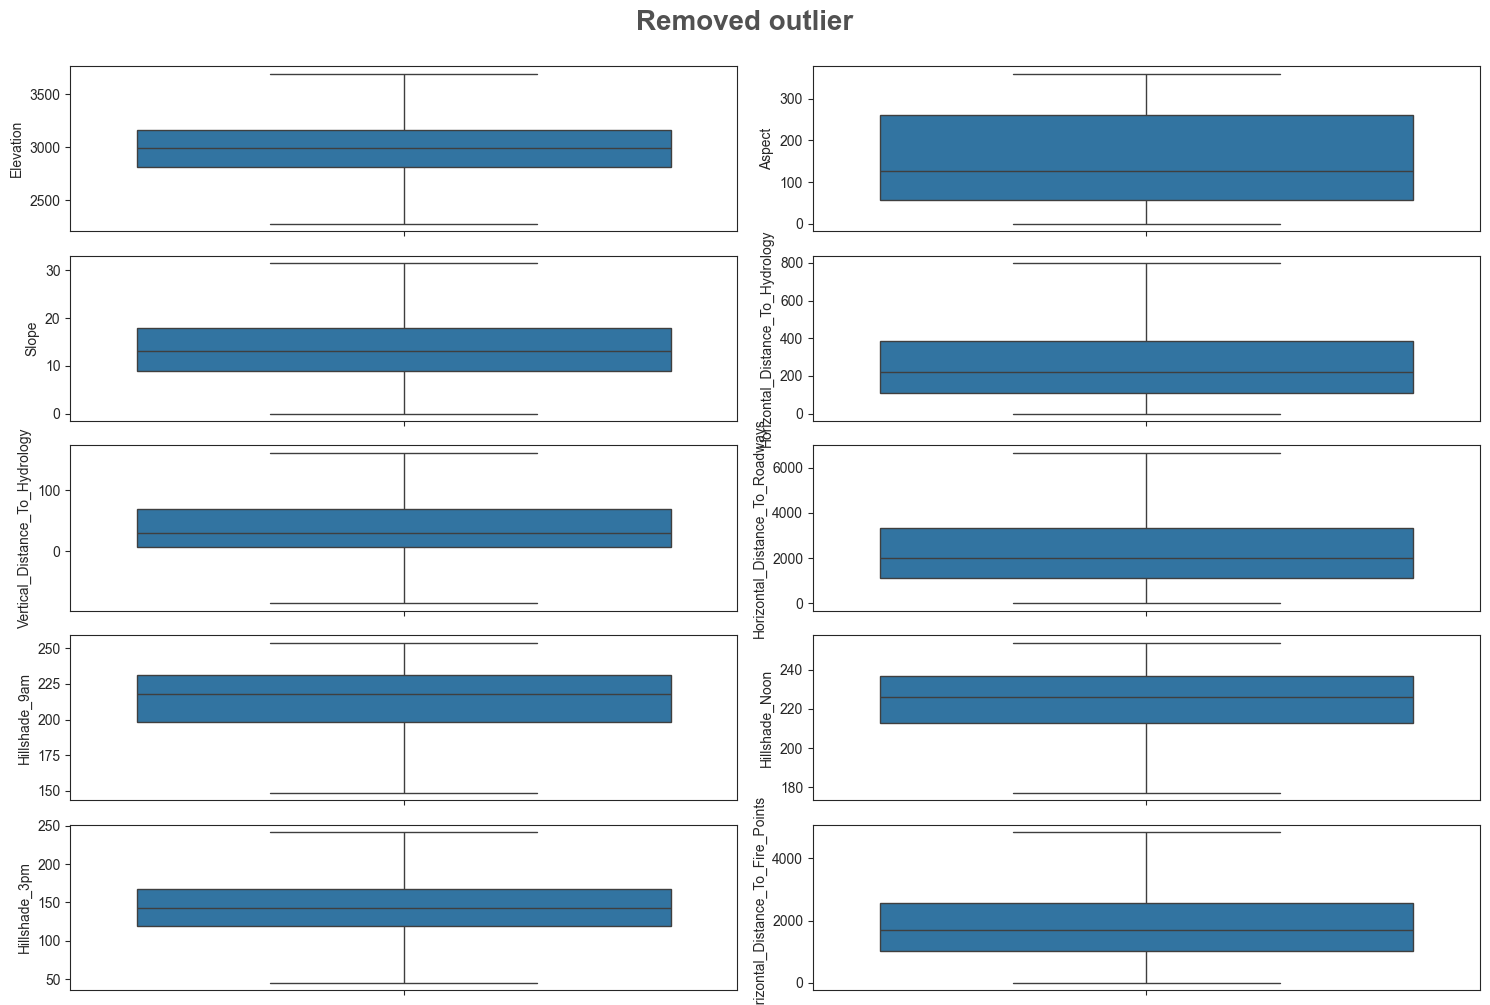

In [18]:
plt.figure(figsize=(15,10))
plt.suptitle("Removed outlier",fontsize=20,fontweight='bold',alpha=0.8,y=1.)
for i in range(0,len(continous_features)):
    plt.subplot(5,2,i+1)
    sns.boxplot(df_copy[continous_features[i]])
    plt.tight_layout()

In [19]:
df.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

Create one column as Wilderness_area_type ans reperesent it as categorical data


In [23]:
df["wilderness_Area_Type"]=(df.iloc[:,10:15]==1).idxmax(1)
wilderness_areas=sorted(df["wilderness_Area_Type"].value_counts().index.tolist())
wilderness_areas


['Wilderness_Area1',
 'Wilderness_Area2',
 'Wilderness_Area3',
 'Wilderness_Area4']

In [ ]:
def split_numbers_chars(row):

    """This function fetches the numerical at the end of a tring
    and returns alphabetical character and numerical characters respectively"""
    head=row.rstrip("0123456789")
    tail=row[len(head):]
    return head,tail

def reverse_one_hot_encode(dataframe,start_loc,end_loc,numeric-column_name):
    ''' this function takes the start and end location of the one-hot-encoded column set and numeric column name to be created as arguments
    1) transforms one-hot-encoded columns into one column consisting of column names with string data type
    2) splits string column into the alphabetical and numerical characters
    3) fetches numerical character and creates numeric column in the given dataframe
    '''
    dataframe['String_Column'] = (dataframe.iloc[:, start_loc:end_loc] == 1).idxmax(1)
    dataframe['Tuple_Column'] = dataframe['String_Column'].apply(split_numbers_chars)
    dataframe[numeric_column_name] = dataframe['Tuple_Column'].apply(lambda x: x[1]).astype('int64')
    dataframe.drop(columns=['String_Column','Tuple_Column'], inplace=True)
    
   


In [ ]:
df_copy = df.copy()
reverse_one_hot_encode(df_copy, 14, 56, "Soil_Type")

In [ ]:
feature_names = continuous_features + wilderness_areas + ["Soil_Type"] + ["Cover_Type"]
all_features_df = df_copy[feature_names]
all_features_df

In [1]:
def split_and_scale_data(df):
    df=df.copy()
    #split data in train and test set
    x=df.drop("Cover_Type",axis=1)
    y=df["Cover_Type"]

    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
    #scale dta using standard scaler
    scaler=StandardScaler()
    scaler.fit(x_train)
    x_train=pd.DataFrame(scaler.transform(x_train),columns=x_train.columns)
    x_test=pd.DataFrame(scaler.transform(x_test),columns=x_test.columns)

    return x_train,x_test,y_train,y_test


In [ ]:
def evaluate_models(model,balanced_class,x_test,y_test):
    model_accuracy=model.score(x_test,y_test)
    print("accuracy{}):{}")

In [ ]:
mongodb+srv://devpandey6652:<db_password>@cluster0.kkfj8pd.mongodb.net/?retryWrites=true&w=majority&appName=Cluster0